In [1]:
from rich import inspect, print

In [2]:
import csv
from sympy.physics.continuum_mechanics.beam import Beam
from sympy.core.symbol import Symbol
from sympy import symbols

import pytest


# 🧩 Workbook 05

This week we are augmenting the file format again. It now looks like this:

<pre>
<b>Beam name</b>
Length, [E, I]
P, pin support locations (comma separated)
F, fixed support locations (comma separated)
Load Magnitude, Load Start, Load Order, [Load End]
Load Magnitude, Load Start, Load Order, [Load End]

<b>Beam name</b>
Length, [E, I]
P, pin support locations (comma separated)
F, fixed support locations (comma separated)
Load Magnitude, Load Start, Load Order, [Load End]
Load Magnitude, Load Start, Load Order, [Load End]

...etc.
</pre>
Here is an example of what the format looks like with real data:

```
RoofBeam1
168,3850,42
P,0,168
120,0,0
240,0,0
              # Note the blank line between beam data remains
SteelBeam34
142,47000,4200
P,0,120
F,0
120,0,0
240,0,0
```

Everything is the same as last week. The only change is that there is now a **beam name** added for which we are going to use a new data type: `dict` instead of `list`. 

With `list` we referenced each beam in the file with its index. By using `dict` we can reference each beam _by its name_!

### A note about code re-use

As you have noticed in this course, there has been opportunity for code re-use from previous workbooks. I encourage you to review your past workbooks and re-use code (like, copy-paste) when you can!

# Task A

Design a function called `read_beams_file` that takes one parameter, a `str` called `filename`, and returns a list of list of string (`list[list[str]]`) representing the lines of data in the file. 

As you are working on your function, be sure to constantly try calling your function to see what the output is, just like you did with running your cells in the previous workbooks. Always print, print, print so you can see what your code is doing!

Write a test for `read_beams_file` and use two `assert` statements to verify that at least two separate lines in the file match the data you expect.

## Task A response

In [3]:
def read_beams_file (file_name: str) -> list[list[str]]:
    """
    Returns a list of list of string that represents lines of data in the file
    """
    beam_acc = []
    with open (file_name, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        for line in csv_reader:
            beam_acc.append(line)
    return (beam_acc)
    
def test_read_beams_file():
    assert read_beams_file("beams.txt")[0] == ["RB1"]
    assert read_beams_file("beams.txt")[1] == ['4800', '19200', '1000000']

## Task A tests

In [4]:
read_beams_file("beams.txt")



[['RB1'],
 ['4800', '19200', '1000000'],
 ['P', '3600'],
 ['F', '0'],
 ['100', '2000', '0'],
 [],
 ['FB45'],
 ['228', '28000', '8000'],
 ['P', '63', '100', '200'],
 ['150', '0', '0'],
 ['350', '0', '0'],
 [],
 ['ConcBeam1'],
 ['9000', '35000', '1000000000'],
 ['F', '1000'],
 ['P', '9000'],
 ['12', '0', '0'],
 ['24', '0', '0']]

In [5]:
test_read_beams_file()

# Task B

Design a function called `convert_to_int` that takes one parameter, a `list[list[str]]`, and returns a `list[list[str, int]` (which means a list of lists that can contain a combination of `str` and `int`).

The function is to convert all numeric strings into integers but leave all non-numeric strings as strings.

Write a test for `convert_to_int` that will test the following input scenarios (each have their own `assert` line):
1. A line with both a str and an int
2. A line with all str
3. A line with postive and negative integers

## Task B response

In [6]:
def convert_to_int(beam_data: list[list[str]]) -> list[list[str, int]]:
    """
    The function is to convert all numeric strings into integers but leave all non-numeric strings as strings.
    """
    int_acc = []
    for line in beam_data:
        inner_list = []
        for  data in line:
            if data.isnumeric() == True:
                inner_list.append(int(data))  
            else:
                inner_list.append(data)
        int_acc.append(inner_list)
    return (int_acc)                                                      
                                                      

In [7]:
beam_acc = read_beams_file("beams.txt")
print(beam_acc)

[
    ['RB1'],
    ['4800', '19200', '1000000'],
    ['P', '3600'],
    ['F', '0'],
    ['100', '2000', '0'],
    [],
    ['FB45'],
    ['228', '28000', '8000'],
    ['P', '63', '100', '200'],
    ['150', '0', '0'],
    ['350', '0', '0'],
    [],
    ['ConcBeam1'],
    ['9000', '35000', '1000000000'],
    ['F', '1000'],
    ['P', '9000'],
    ['12', '0', '0'],
    ['24', '0', '0']
]

## Task B tests

In [8]:
beam_acc_int = convert_to_int(beam_acc)

In [9]:
def test_read_beams_file():
    assert convert_to_int(beam_acc)[0] == ["RB1"]
    assert convert_to_int(beam_acc)[1] == ['4800', '19200', '1000000']

# Task C

Design a function called `separate_beam_data` that takes one parameter, a `list[list[str, int]]` and returns a `dict[str, list[list[str, int]]]` (a dictionary with `str` keys and values of `list[list[str, int]]`).

Similar to **Task C** in **Workbook 04**, this function will separate the beam data. However, it will be slightly different than the code in **Task 04/C** in that you will now "parse" the name of the beam. The name of the beam will become the dictionary key and, with the resulting dictionary, you will be able to see the beam data by using the beam name as the index.

e.g.

**Task 04/C** resulted in this:
```python
beams[1] # Access list index 1 to return the list[list[str, int]]
```

```
[[228, 28000, 756], ['P', 63, 100, 200], [150, 0, 0], [350, 0, 0]]
```

**Task 05/C** will result in this:
```python
beams["FB45"]
```

```
[[228, 28000, 756], ['P', 63, 100, 200], [150, 0, 0], [350, 0, 0]]
```

## Task C response

In [10]:
print (beam_acc_int)

[
    ['RB1'],
    [4800, 19200, 1000000],
    ['P', 3600],
    ['F', 0],
    [100, 2000, 0],
    [],
    ['FB45'],
    [228, 28000, 8000],
    ['P', 63, 100, 200],
    [150, 0, 0],
    [350, 0, 0],
    [],
    ['ConcBeam1'],
    [9000, 35000, 1000000000],
    ['F', 1000],
    ['P', 9000],
    [12, 0, 0],
    [24, 0, 0]
]

In [11]:
def separate_beam_data(beam_information: list[list[str, int]]) -> dict[str, list[list[str, int]]]:

    beams = []
    current_beam = 0
    for idx, line in enumerate(beam_information):
        if idx == 0:
            beams.append([])
            beams[current_beam].append(line)
        elif not line:
            beams.append([])
            current_beam += 1
        else:
            beams[current_beam].append(line)
    
    #print(beams)
    
    beam_dict = {}
    for idx, line in enumerate(beams):
        beam_dict [beams[idx][0][0]] = beams[idx][1:]
    
    return(beam_dict)


## Task C tests

In [12]:
beam_acc_int = convert_to_int(beam_acc)
separate_beam_data(beam_acc_int)

{'RB1': [[4800, 19200, 1000000], ['P', 3600], ['F', 0], [100, 2000, 0]],
 'FB45': [[228, 28000, 8000], ['P', 63, 100, 200], [150, 0, 0], [350, 0, 0]],
 'ConcBeam1': [[9000, 35000, 1000000000],
  ['F', 1000],
  ['P', 9000],
  [12, 0, 0],
  [24, 0, 0]]}

# Task D

Now, this is where things are going to steer away from how they were done in **Workbook 04**. 

In Workbook 04, we had a big loop that added all of the data for one beam into a new `Beam` object for analysis. In **Workbook 05** we are going to break this whole loop up into three separate functions.

First, you are going to design a function called `add_pin_support_to_beam`. It will take **three** parameters, as follows:
1. A sympy `Beam` object
2. An integer representing which support number it is (e.g. `0`, `1`, `2`, etc.)
3. An integer representing a support location on the beam (e.g. `0` or `1800` or whatever)

It will return a `tuple[Beam, Symbol]` which is a way of saying that it will return **two** values (which will automatically be bundled up in a `tuple` by Python).

**Note:** For pin supports, be sure to name your reaction symbol something like `"RP_0"` or `"RP_1"` where `"0"` and `"1"` represent your support number.

> ### Why are we returning _two_ values?

> If you look back to **Task 04/D**, when we created a pin support, we had to do a few things:
> 1. Add our reaction `Symbol` (e.g. `RP_1` or whatever) to a list of reaction symbols
> 2. Add our reactions as "loads" to the `Beam` object
> 3. Add our boundary conditions at the support location (within the `Beam` object)

> Items **2** and **3** are changes made to the `Beam` object and when we return the altered `Beam` object at the end of our function it will have the changed data within it. 

> When we _solve_ the beam object with `.solve_for_reaction_loads()` we have to pass all of our reaction symbols to the `.solve_for_reaction_loads()` method in order for them to be solved. This means, after our function runs, we need to have access to the reaction symbol that was created _within_ the function. Remember, using `return` is the way that we can transfer data from inside the function scope to outside the function scope. By returning the symbol created within the function along with the `Beam`, we can add the symbol to an accumulator in our "master loop".

# Task D response

In [13]:
def add_pin_support_to_beam(beam, support_ID: int, support_location: int) -> tuple[Beam, Symbol]:
    
    RP = symbols(f"RP_{support_ID}")
    p_deflection = (support_location, 0)
    beam.apply_load(RP, support_location, -1)
    beam.bc_deflection.append(p_deflection)
    
    return (beam, RP)


# Task D test

In [14]:
def test_add_pin_suppot_to_beam():
    
    beams_dict = (separate_beam_data(beam_acc_int))
    LEI_test = beams_dict['RB1'][0]
    print(LEI_test)
    my_beam_test = Beam(*LEI_test)
    
    print(my_beam_test)
    print(add_pin_support_to_beam(my_beam_test, 0, 3600))
    
test_add_pin_suppot_to_beam()
    

[4800, 19200, 1000000]

Beam(4800, 19200, 1000000)

(<sympy.physics.continuum_mechanics.beam.Beam object at 0x000001A4FBFEC7F0>, RP_0)

# Task E

This the second of the three "break out" functions.

Similar to **Task D**, you are now going to design a function called `add_fix_support_to_beam`. It will take **three** parameters, as follows:

1. A sympy `Beam` object
2. An integer representing which support number it is (e.g. `0`, `1`, `2`, etc.)
3. An integer representing a support location on the beam (e.g. `0` or `1800` or whatever)

It will return a `tuple[Beam, Symbol, Symbol]` which is a way of saying that it will return **three** values: the `Beam` object, the deflection reaction, and the slope reaction.

**Note:** For fix supports, be sure to name your reaction symbols something like `"RD_0"` and `"RD_1"` (for deflection unknowns) and `"RS_0"` and `"RS_1"` (for slope unknowns), where `"0"` and `"1"`, etc. just represent the support number.

## Task E response

In [15]:
def add_fix_support_to_beam(beam, support_ID: int, support_location: int) -> tuple[Beam, Symbol, Symbol]:
    
    RFD = symbols(f"RD_{support_ID}")
    RFS = symbols(f"RS_{support_ID}")
    f_deflection = (support_location, 0)
    beam.apply_load(RFD, support_location, -1)
    beam.apply_load(RFS, support_location, -2)
    beam.bc_deflection.append(f_deflection)
    beam.bc_slope.append(f_deflection)
    
    return (beam, RFD, RFS)

## Task E tests



In [16]:
def test_add_fix_suppot_to_beam():
    beams_dict = (separate_beam_data(beam_acc_int))
    LEI_test = beams_dict['RB1'][0]
    my_beam_test = Beam(*LEI_test)
    
    print(my_beam_test)
    print(add_fix_support_to_beam(my_beam_test, 0, 0))
    

test_add_fix_suppot_to_beam()
    

Beam(4800, 19200, 1000000)

(<sympy.physics.continuum_mechanics.beam.Beam object at 0x000001A4FEFEB340>, RD_0, RS_0)

# Task F

This is the third of the three "break out" functions.

Design a function called `solve_beam`. It takes one parameter: a `list[list[str]]` which represents all of the data for one beam from the file data. The function returns a `Beam` object with all of the data loaded into it and after `.solve_for_reaction_loads()` has been called on the beam.

To accomplish this, you will be calling the functions you created in **Task D** and **Task E** _within_ this final function. Think of them as your "helper" functions.

Feel free to also refer to your **Task 04/D** response for guidance.

**Tests** 

Because we are working with `sympy` objects, doing a proper test on the solved beam is a bit fussier. So I will give you a test to run that checks to see if the reaction load from a UDL comes out as expected and the moment from a cantilevered beam comes out as expected.

Copy-paste the below code into the **...test** cell


```python
import pytest

def test_solve_beam():
    test_beams = {
        'bm1': [
        [4000, 200e9, 450000000],
        ['P', 0, 4000],
        [100, 0, 0]
        ],
        'bm2': [
        [4000, 200e9, 450000000],
        ['F', 0],
        [100, 0, 0],
        ]     
    }
    bm1 = solve_beam(test_beams['bm1'])
    reactions = bm1.reaction_loads
    reaction_symbols = [symbol for symbol in reactions.keys()]
    pytest.approx(
        float(reactions[reaction_symbols[0]]), 4000*100/2
    )
    bm2 = solve_beam(test_beams['bm2'])
    reactions = bm2.reaction_loads
    reaction_symbols = [symbol for symbol in reactions.keys()]
    pytest.approx(
        float(reactions[reaction_symbols[1]]), 4000*100**2/2
    )
    
ipytest.run()
```
    


## Task F response

In [24]:
def solve_beam (beam_data: list[list[str]]) -> Beam:

    """
    Returns a Beam object with all of the data loaded into it and after
    .solve_for_reaction_loads() has been called on the beam.
    """
    
    loads = []
    reactions = []
    f_reactions = []
    
    for idx, line in enumerate (beam_data):
        if idx == 0:
            LEI = line
            my_beam = Beam(*LEI)
            
        elif 'P' in line:
            for p_idx, item in enumerate (line[1:]):
                reactions.append(add_pin_support_to_beam(my_beam, p_idx, line[p_idx+1])[1])
                
        elif 'F' in line:
            for f_idx, item in enumerate (line[1:]):
                f_reactions.append(add_fix_support_to_beam(my_beam, f_idx, line[f_idx+1])[1:])
        
        else:
            loads.append(line)
            
    for fix_line in f_reactions:
        for item in fix_line:
            reactions.append(item)
            
    for loads_line in loads:
        mso = line
        my_beam.apply_load(*mso)
    
    print (my_beam)
    print (reactions)
    print (f_reactions)
    print (loads)
    
    my_beam.solve_for_reaction_loads(*reactions)
    print(my_beam.reaction_loads)
    
    my_beam_plot = my_beam.draw()
    my_beam_plot.show()
    
    return (my_beam)
            

Beam(4800, 19200, 1000000)

[RP_0, RP_1, RD_0, RS_0]

[(RD_0, RS_0)]

[[100, 2000, 0]]

{RP_0: -1797500/7, RP_1: -642500/7, RD_0: 480000/7, RS_0: -64000000/7}

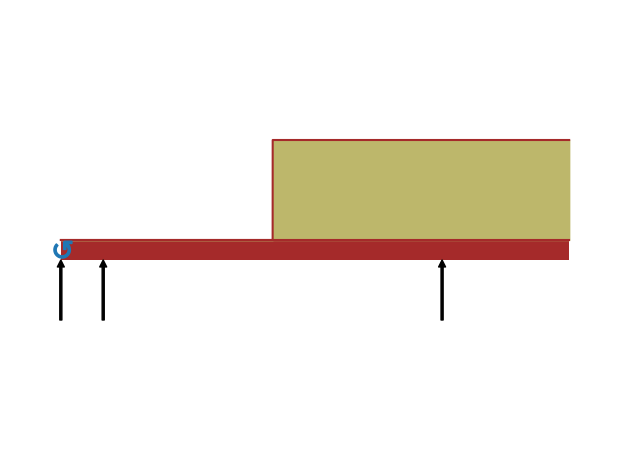

In [26]:
solve_beam(
    
    [[4800, 19200, 1000000],
    ['P', 3600, 400],
    ['F', 0],
    [100, 2000, 0]]
    
)

## Task F test

In [ ]:
import pytest

def test_solve_beam():
    test_beams = {
        'bm1': [
        [4000, 200e9, 450000000],
        ['P', 0, 4000],
        [100, 0, 0]
        ],
        'bm2': [
        [4000, 200e9, 450000000],
        ['F', 0],
        [100, 0, 0],
        ]     
    }
    bm1 = solve_beam(test_beams['bm1'])
    reactions = bm1.reaction_loads
    reaction_symbols = [symbol for symbol in reactions.keys()]
    pytest.approx(
        float(reactions[reaction_symbols[0]]), 4000*100/2
    )
    bm2 = solve_beam(test_beams['bm2'])
    reactions = bm2.reaction_loads
    reaction_symbols = [symbol for symbol in reactions.keys()]
    pytest.approx(
        float(reactions[reaction_symbols[1]]), 4000*100**2/2
    )
    
ipytest.run()


# Task G

Try using your functions!

In the cell below, try this:

```python
filename = "beams.txt"
beams_data = separate_beams_data(convert_to_int(read_beams_file(filename)))
print([key for key in beams_data.keys()])
beam = solve_beam(beams_data['RB1'])
beam.plot_shear_force()
beam.plot_bending_moment()
beam.plot_deflection()
```

1. Try putting in the different beam names to see the different diagrams
2. The above code is still a bit script-y. You could probably write some more functions to make things easier to use. For example, using your existing functions, it would probably be easy to write a short function that prints all of the beam names from the beam file. Do you see how you could do it? You don't need to write it for this assignment (just think about it and imagine what you would do) but if you want extra practice, feel free!
3. Maybe it would be easy to write a function to plot all three diagrams given a solved beam as an input parameter? You don't need to write it for this assignment (just think about it and imagine what you would do) but if you want extra practice, feel free!
4. Maybe you could write one function that reads all of the beams in a beams file and prints all of the results in one go. To do all this, you would only need one input parameter: the filename! Talk about automation, yeah?
5. You have written a lot of Python code, friend! Lets see what it looks like. Copy and paste all of your functions (but not your test functions), sequentially (A -> B -> C..., etc.) into the cell below. Stand back and just look at them all. This is what writing a program looks like :)


In [ ]:
filename = "beams.txt"
beams_data = separate_beam_data(convert_to_int(read_beams_file(filename)))
print([key for key in beams_data.keys()])
beam = solve_beam(beams_data['RB1'])
beam.plot_shear_force()
beam.plot_bending_moment()
beam.plot_deflection()

## Task G response: Paste your functions down below

# 🎷 Submit Workbook 05

This was a big assignment. Hopefully it went a little faster because you were able to copy-paste and generally re-use code you have written before.

The process of writing functions and "helper" functions is part of what's called "functional program design". You write functions that perform all of the individual small tasks you need to do. From there, you combine them to perform the larger tasks. Eventually, you may end up with a program that just calls one or two functions to do all of the work by calling all of your smaller functions. 

This is one very good way of designing programs. Done properly (using one-task-per-function and writing tests for each function) you can build powerful and robust programs very quickly.

For now, just commit and push your workbook to your GitHub repo.